<a href="https://colab.research.google.com/github/wakooota/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns,set()

#csvファイルをダウンロード
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f1f7ca543c33164c1711845828872c0b724a7ea3b0a33bc59d1b7a40a8b7888d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [11]:
import japanize_matplotlib
import seaborn as sns

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

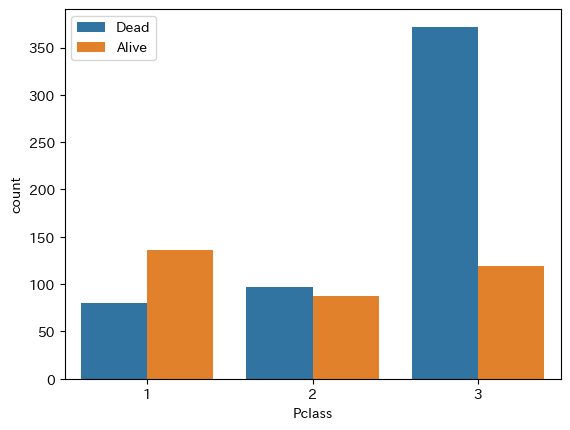

In [14]:
#Pclass（チケットランク）別の生存率
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
plt.legend(labels=["Dead", "Alive"])
plt.show()

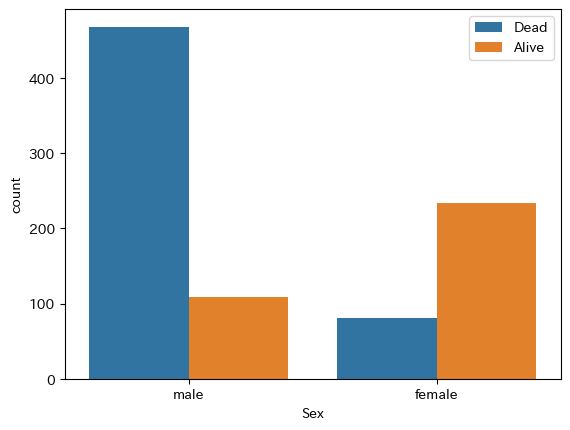

In [12]:
#Sex(性別)ごとの生存率
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.legend(labels=["Dead", "Alive"])
plt.show()

AttributeError: ignored

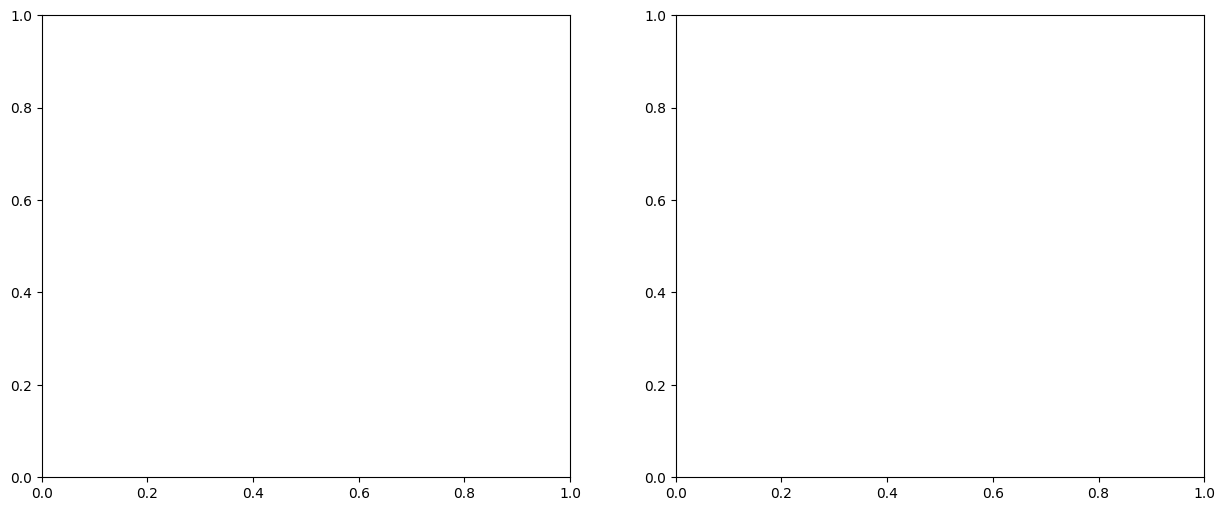

In [ ]:
#Age(年齢)ごとの生存率
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
train[train['Survived']==0]['Age'].ax[0, 1].plot(kind='hist', bins=50, title='Dead')
train[train['Survived']==1]['Age'].ax[0, 0].plot(kind='hist', bins=50, title='Alive')

ax[0, 1].plt.ylabel('Count')
ax[0, 1].plt.ylim(0 , 40)
ax[0, 1].plt.show()

ax[0, 0].plt.ylabel('Count')
ax[0, 0].plt.ylim(0 , 40)
ax[0, 0].plt.show()

#【質問】調べたりしていますが、エラーが消えないです・・・・

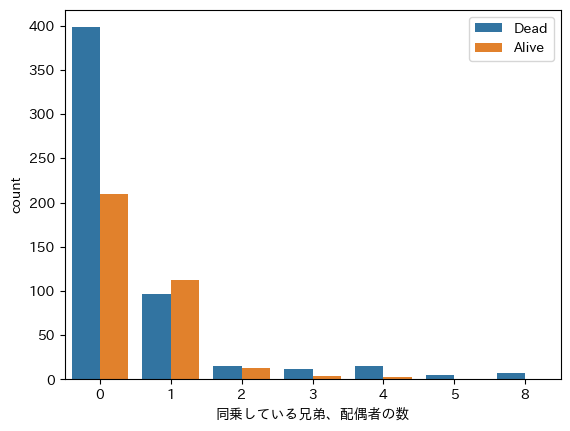

In [47]:
#Sibsp(同乗している兄弟、配偶者の数)ごとの生存率
p = sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

#【質問】ラベルのつけ方はあっていますでしょうか。「0はDeadで1はAliveである」と記載したかったのですが、うまくいかなかったので、上述の通り記載して対処しました。

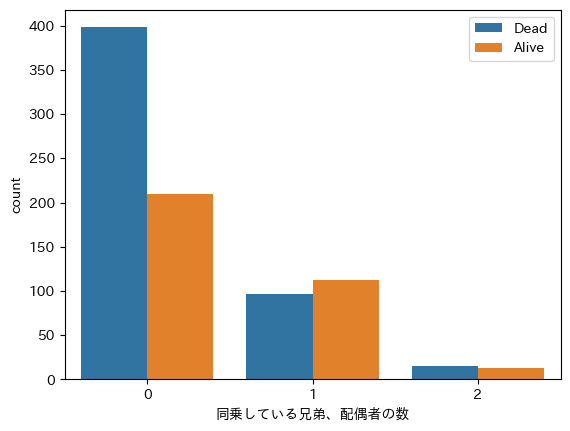

In [57]:
#【訓練】SibSpが3以上の情報を削除してグラフ化
droped_train = train.drop(train.query('SibSp > 2').index)
sns.countplot(x = 'SibSp', hue = 'Survived', data = droped_train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

<Axes: xlabel='SibSp', ylabel='Survived'>

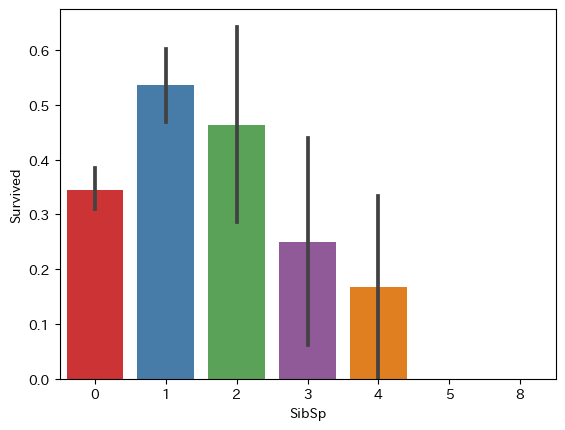

In [85]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='Set1')

#【質問】これは生存率（SibSpごとのSurvivedの平均値）を示していそうだが、勝手に平均値が出力されるコードなのでしょうか。

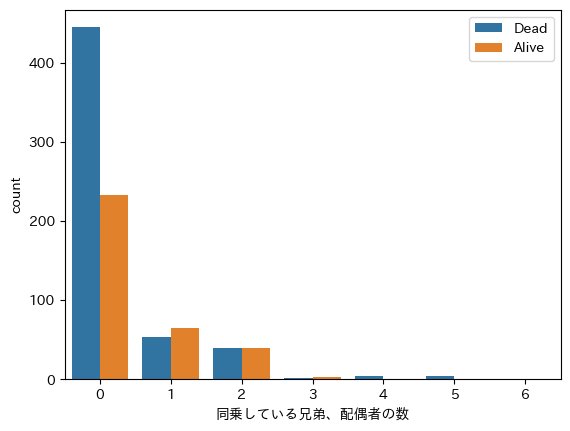

In [19]:
#Parch（同乗している兄弟、配偶者の数）ごとの生存率
sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

In [7]:
#Ticket（チケット番号）のヒストグラム

#Ticketの列に文字列型を含む情報がはいった行を削除
train[train['Ticket'] != str]['Ticket'].plt(kind='hist', bins=100)
plt.show()

#【質問】Ticketの列に文字列型を含む情報が入った行を削除してから、ヒストグラムで表示させたいが、うまくいかないです。

AttributeError: ignored

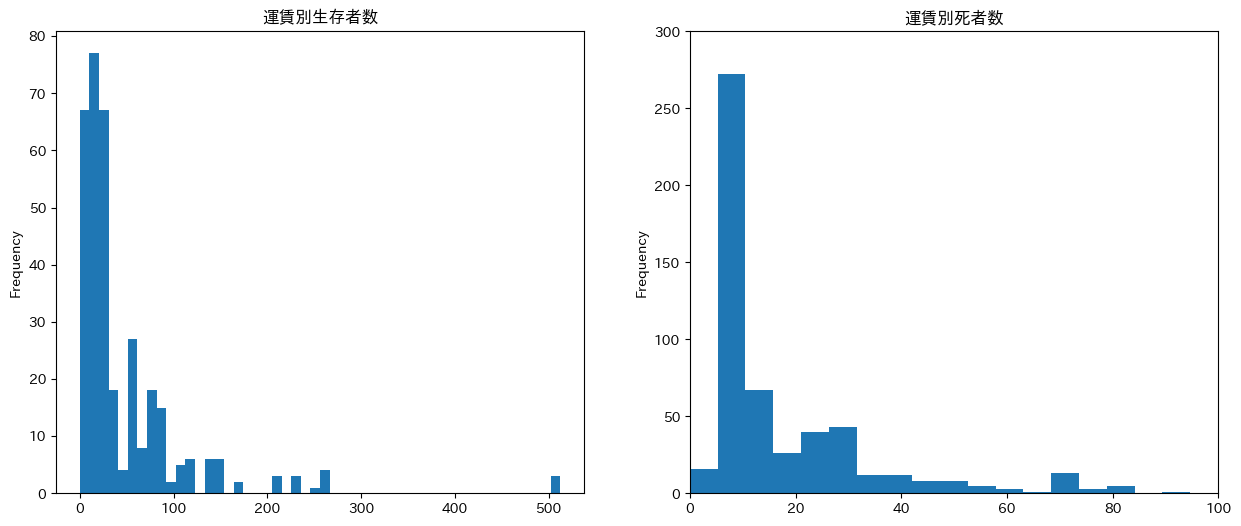

In [19]:
#Fare（運賃）のヒストグラム
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
train[train['Survived']==1]['Fare'].plot(kind='hist', bins=50, title = '運賃別生存者数'.format('Fare', 'Survived'), ax=ax[0])
train[train['Survived']==0]['Fare'].plot(kind='hist', bins=50, title = '運賃別死者数'.format('Fare', 'Survived'), ax=ax[1])

#縦軸をそろえる
plt.xlim(0, 100)
plt.ylim(0, 300)
plt.show()

#【質問】「運賃別生存者数」の横軸と縦軸を合わせたいのですが、サムライの教材をみたりしてax[x, x]を使ってみましたが、うまくいきませんでした。

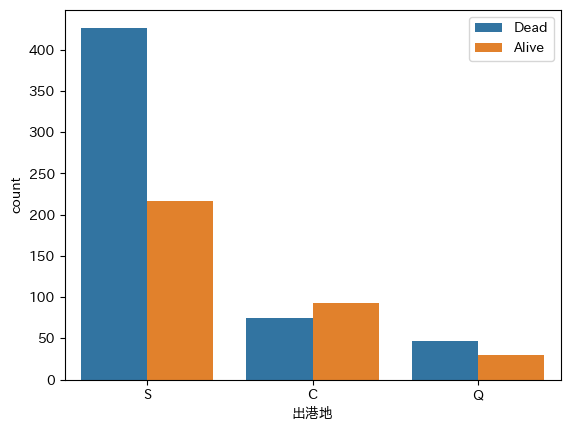

In [92]:
#Embarked（出向港）ごとの生存率
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)
plt.xlabel("出港地")
plt.legend(labels=["Dead", "Alive"])


plt.show()

#【質問】グラフ上に数値を記載する方法もチャレンジしてみましたが、検索してもよい例がみつけられませんでした。
# https://www.delftstack.com/ja/howto/matplotlib/add-value-labels-on-matplotlib-bar-chart/ を参照して以下を追記しましたがうまくいきませんでした。
# def add_value_label(x_list, y_list):
#   add_value_lavel(x, hue)


<Axes: xlabel='Embarked', ylabel='count'>

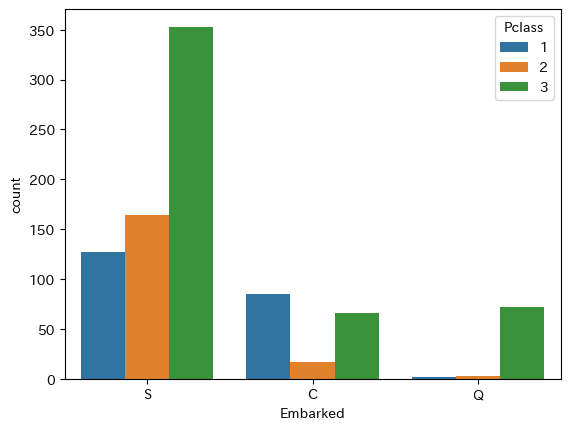

In [67]:
#なぜ出港地がCherbourgだと生存率が高いのか
#仮説：Cherbourgからの乗客はPclass1で乗船する割合が高い

#出港地別のPclassを確認
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train)


In [149]:
from numpy.lib.index_tricks import c_
from itertools import count
#仮説「Cherbourgからの乗客はPclass1で乗船する割合が高い」を検証

#港ごとの乗船クラスの割合を計算して出力
#①Embarked情報には欠測値が2件あるが、全体数に比べて大きくないので当該情報は削除して検討をする。
df_riv_embarked = train.drop(train.query('Embarked.isnull()').index)

#Sからの乗船者
s_guest = df_riv_embarked.query("Embarked=='S'")['Embarked'].count()
#Sからの乗船者、かつ、Pclass1の数
s_guest_class1 = df_riv_embarked.query("Embarked=='S' & Pclass==1")['Embarked'].count()
ratio_class1_s = s_guest_class1/s_guest

print(f"Sから乗船した乗客のうち、Pclass1の割合:{ratio_class1_s}")

#Cからの乗船者
c_guest = df_riv_embarked.query("Embarked=='C'")['Embarked'].count()
#Cからの乗船者、かつ、Pclass1の数
c_guest_class1 = df_riv_embarked.query("Embarked=='C' & Pclass==1")['Embarked'].count()
ratio_class1_c = c_guest_class1/c_guest

print(f"Cから乗船した乗客のうち、Pclass1の割合:{ratio_class1_c}")

#Qからの乗船者
q_guest = df_riv_embarked.query("Embarked=='Q'")['Embarked'].count()
#Qからの乗船者、かつ、Pclass1の数
q_guest_class1 = df_riv_embarked.query("Embarked=='Q' & Pclass==1")['Embarked'].count()
ratio_class1_q = q_guest_class1/q_guest

print(f"Qから乗船した乗客のうち、Pclass1の割合:{ratio_class1_q}")

#仮説を立証
#"for"を使ってもっとシンプルに記載できるものでしょうか。

Sから乗船した乗客のうち、Pclass1の割合:0.1972049689440994
Cから乗船した乗客のうち、Pclass1の割合:0.5059523809523809
Qから乗船した乗客のうち、Pclass1の割合:0.025974025974025976


In [160]:
from numpy.lib.index_tricks import c_
from itertools import count
#仮説「Cherbourgからの乗客はPclass1で乗船する割合が高い」を検証

#港ごとの乗船クラスの割合を計算して出力
#①Embarked情報には欠測値が2件あるが、全体数に比べて大きくないので当該情報は削除して検討をする。
df_riv_embarked = train.drop(train.query('Embarked.isnull()').index)

ports = ["S", "C", "Q"]
for port in ports:

#portからの乗船者
  guest = df_riv_embarked.query("Embarked=='port'")['Embarked'].count()
#portからの乗船者、かつ、Pclass1の数
  guest_class1 = df_riv_embarked.query("Embarked=='port' & Pclass==1")['Embarked'].count()
  ratio_class1 = guest_class1/guest

  print(f"{port}から乗船した乗客のうち、Pclass1の割合:{ratio_class1}")

#【質問】エラーはでないのですが、なぜPclassの割合が"nan"になってしまうのでしょうか・・・


Sから乗船した乗客のうち、Pclass1の割合:nan
Cから乗船した乗客のうち、Pclass1の割合:nan
Qから乗船した乗客のうち、Pclass1の割合:nan


<ipython-input-160-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest
<ipython-input-160-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest
<ipython-input-160-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest
